In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch.nn.functional as F
from torch.utils.data import Dataset,DataLoader

In [3]:
!pip install ndjson

In [4]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
a=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_airplane.npy')
print(a)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(a.shape)

(151623, 784)


In [6]:
b=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_ant.npy')
c=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_banana.npy')
d=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_baseball.npy')
e=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_bird.npy')
f=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_bucket.npy')
g=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_butterfly.npy')
h=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_cat.npy')
i=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_coffee cup.npy')
j=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_dolphin.npy')
k=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_donut.npy')
l=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_duck.npy')
m=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_fish.npy')
n=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_leaf.npy')
o=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_mountain.npy')
p=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_pencil.npy')
q=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_smiley face.npy')
r=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_snake.npy')
s=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_umbrella.npy')
t=np.load('/content/drive/MyDrive/Doodle dataset/Doodle dataset.rar (Unzipped Files)/full_numpy_bitmap_wine bottle.npy')

In [7]:
classes=('airplane','ant','banana','baseball','bird','bucket','butterfly','cat','coffee cup','dolphin','donut','duck','fish','leaf','mountain','pencil','smiley face','snake','umbrella','wine bottle')
print(len(classes))


20


In [8]:
data_conc=np.concatenate((a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t))
# print(conc)
# print(conc.shape)

In [9]:
a_label=np.full([151623, 1],0,dtype=int)
print(a_label)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [10]:
b_label=np.full([b.shape[0], 1], 1, dtype=int)
#print(b_label)
c_label=np.full([c.shape[0], 1], 2, dtype=int)
d_label=np.full([d.shape[0], 1], 3, dtype=int)
e_label=np.full([e.shape[0], 1], 4, dtype=int)
f_label=np.full([f.shape[0], 1], 5, dtype=int)
g_label=np.full([g.shape[0], 1], 6, dtype=int)
h_label=np.full([h.shape[0], 1], 7, dtype=int)
i_label=np.full([i.shape[0], 1], 8, dtype=int)
j_label=np.full([j.shape[0], 1], 9, dtype=int)
k_label=np.full([k.shape[0], 1], 10, dtype=int)
l_label=np.full([l.shape[0], 1], 11, dtype=int)
m_label=np.full([m.shape[0], 1], 12, dtype=int)
n_label=np.full([n.shape[0], 1], 13, dtype=int)
o_label=np.full([o.shape[0], 1], 14, dtype=int)
p_label=np.full([p.shape[0], 1], 15, dtype=int)
q_label=np.full([q.shape[0], 1], 16, dtype=int)
r_label=np.full([r.shape[0], 1], 17, dtype=int)
s_label=np.full([s.shape[0], 1], 18, dtype=int)
t_label=np.full([t.shape[0], 1], 19, dtype=int)

In [11]:
label_conc=np.concatenate((a_label,b_label,c_label,d_label,e_label,f_label,g_label,h_label,i_label,j_label,k_label,l_label,m_label, n_label,o_label,p_label,q_label,r_label,s_label, t_label))
a1=np.arange(0,2807037)
np.random.shuffle(a1)
data_conc=data_conc[a1,:]
label_conc=label_conc[a1,:]

In [12]:
print(data_conc.shape)
print(label_conc.shape)

(2807037, 784)
(2807037, 1)


In [13]:

batch_size=4096
learning_rate=0.01
num_epochs=10

class Data_train(Dataset):
  def __init__(self):
    self.x= data_conc[:2045200,:].reshape(2045200,1,28,28)
    self.y= label_conc[:2045200,:].reshape(2045200,)
    self.n= data_conc[:2045200,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_train=Data_train()
dataloader_train=DataLoader(data_train,batch_size=4096,shuffle=True)

class Data_test(Dataset):
  def __init__(self):
    self.x= data_conc[2045200:,:].reshape(2807037-2045200,1,28,28)
    self.y= label_conc[2045200:,:].reshape(2807037-2045200,)
    self.n= data_conc[2045200:,:].shape[0]
  def __getitem__(self,i):
    return self.x[i],self.y[i]
  def __len__(self):
    return self.n
data_test=Data_test()
dataloader_test=DataLoader(data_test,batch_size=4096,shuffle=True)




In [15]:

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1=nn.Conv2d(1, 6, 5)
    self.pool=nn.MaxPool2d(2,2)
    self.conv2=nn.Conv2d(6, 16, 5)
    self.fc1=nn.Linear(16*4*4, 120)
    self.fc2=nn.Linear(120, 84)
    self.fc3=nn.Linear(84, 20)


  def forward(self, x):
    x=self.pool(F.relu(self.conv1(x)))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1, 16*4*4)
    
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.fc3(x)
    return x

model=ConvNet().to(device)

criterion=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model.parameters(), lr=learning_rate)

train_losses = []
train_counter = []
test_losses = []


In [16]:

for epoch in range(num_epochs):
  for i,(images,labels) in enumerate(dataloader_train):
    images=images.to(device)
    labels=labels.to(device)
    # print(labels.shape)
    #forward
    outputs=model(images.float())
    #print(outputs.shape)

    loss=criterion(outputs,labels)


    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
      print(f'Training Epoch[{epoch+1}/{num_epochs}],loss:{loss.item():.4f}')

  train_losses.append(loss.item())

print('Finished training')

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training Epoch[1/10],loss:8.0739
Training Epoch[1/10],loss:1.6766
Training Epoch[1/10],loss:1.2493
Training Epoch[1/10],loss:1.0875
Training Epoch[1/10],loss:0.9583
Training Epoch[2/10],loss:0.9124
Training Epoch[2/10],loss:0.8573
Training Epoch[2/10],loss:0.8402
Training Epoch[2/10],loss:0.7989
Training Epoch[2/10],loss:0.7881
Training Epoch[3/10],loss:0.8004
Training Epoch[3/10],loss:0.7071
Training Epoch[3/10],loss:0.7050
Training Epoch[3/10],loss:0.7069
Training Epoch[3/10],loss:0.7142
Training Epoch[4/10],loss:0.6280
Training Epoch[4/10],loss:0.6494
Training Epoch[4/10],loss:0.6179
Training Epoch[4/10],loss:0.6603
Training Epoch[4/10],loss:0.6513
Training Epoch[5/10],loss:0.6058
Training Epoch[5/10],loss:0.6603
Training Epoch[5/10],loss:0.6188
Training Epoch[5/10],loss:0.5876
Training Epoch[5/10],loss:0.6084
Training Epoch[6/10],loss:0.5619
Training Epoch[6/10],loss:0.5906
Training Epoch[6/10],loss:0.5526
Training Epoch[6/10],loss:0.5563
Training Epoch[6/10],loss:0.5868
Training E

In [17]:
def test(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_test):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Test accuracy = {acc:.4f}')

def train(): 
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in (dataloader_train):
      images=images.to(device)
      labels=labels.to(device)
      outputs = model(images.float())

      _,predictions = torch.max(outputs, 1) #torch.max function will return the value and the index and we are interested in the actual index
      n_samples += labels.shape[0]
      n_correct += (predictions == labels).sum().item()
  
    acc = 100* n_correct / n_samples
    print(f'Training accuracy = {acc:.4f}')

train()
test()

Training accuracy = 85.0053
Test accuracy = 84.9207


Text(0.5, 1.0, 'batch size 1024, lr 0.01, epochs 10')

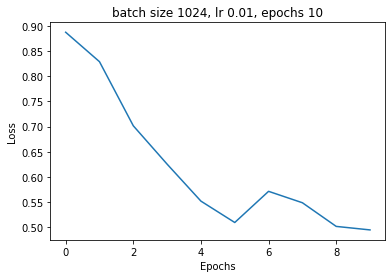

In [19]:
plt.plot(train_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("batch size 1024, lr 0.01, epochs 10")

In [20]:
#saving model
FILE = "model1.pth"
torch.save(model.state_dict(), FILE)

In [21]:
#loading model for evalution 
FILE = "model1.pth"
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(FILE)) # it takes the loaded dictionary, not the path file itself
loaded_model.eval()


ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=20, bias=True)
)

it's a  fish


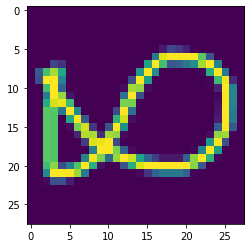

In [22]:
#testing
import random
i=np.random.randint(1,2807037)
img=torch.tensor(data_conc[i]).to(device).float()
img=img.reshape(1,1,28,28)
l=label_conc[i]
res=loaded_model(img)
i=torch.argmax(res)


plt.imshow(img.to('cpu').detach().numpy().reshape(28,28))
print("it's a ",classes[i.item()])